In [1]:
%load_ext pyinstrument
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm
import copy

local


In [2]:
#%%pyinstrument
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

(1099, 1)

{'main': CompoundNamed(comment='.signal.main')}


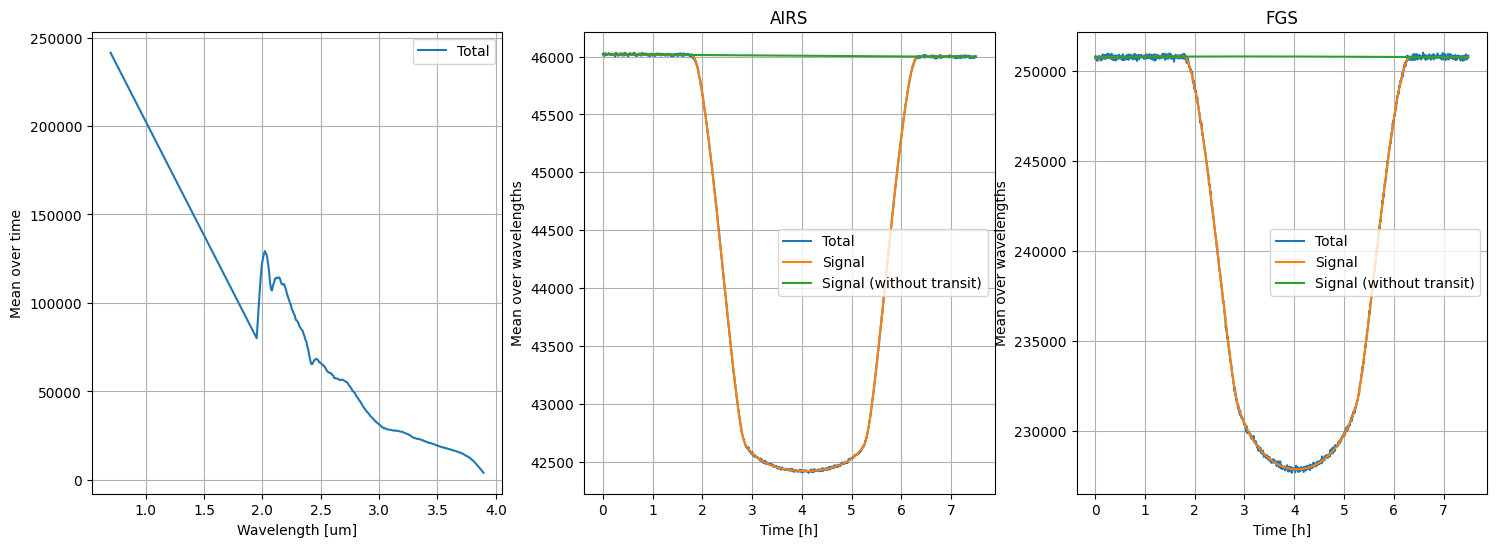

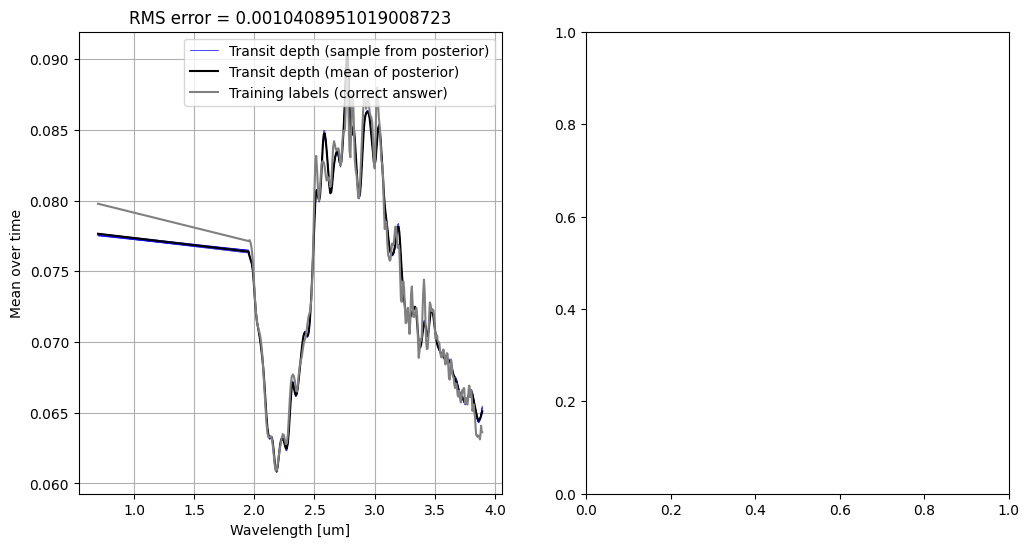

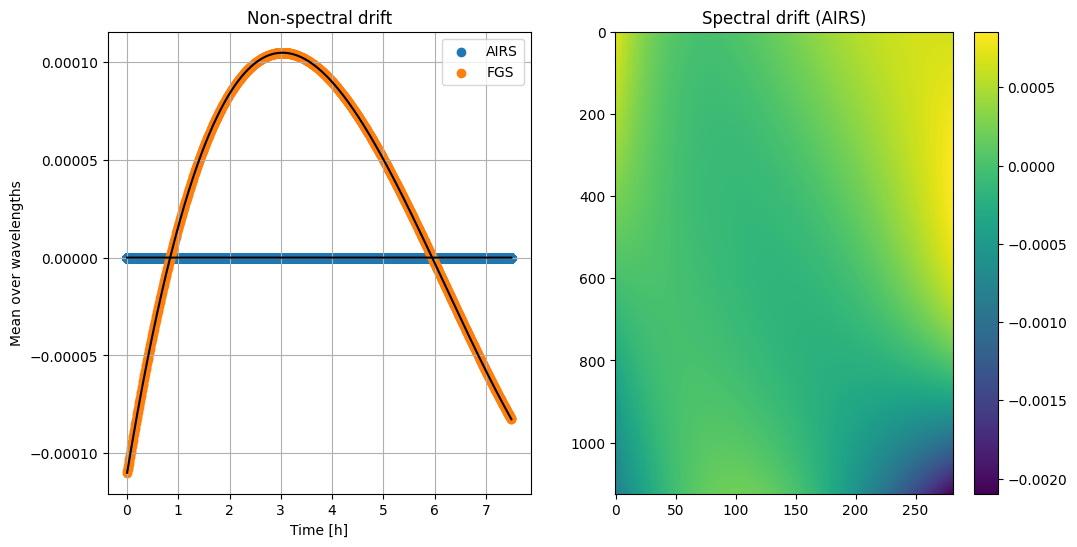

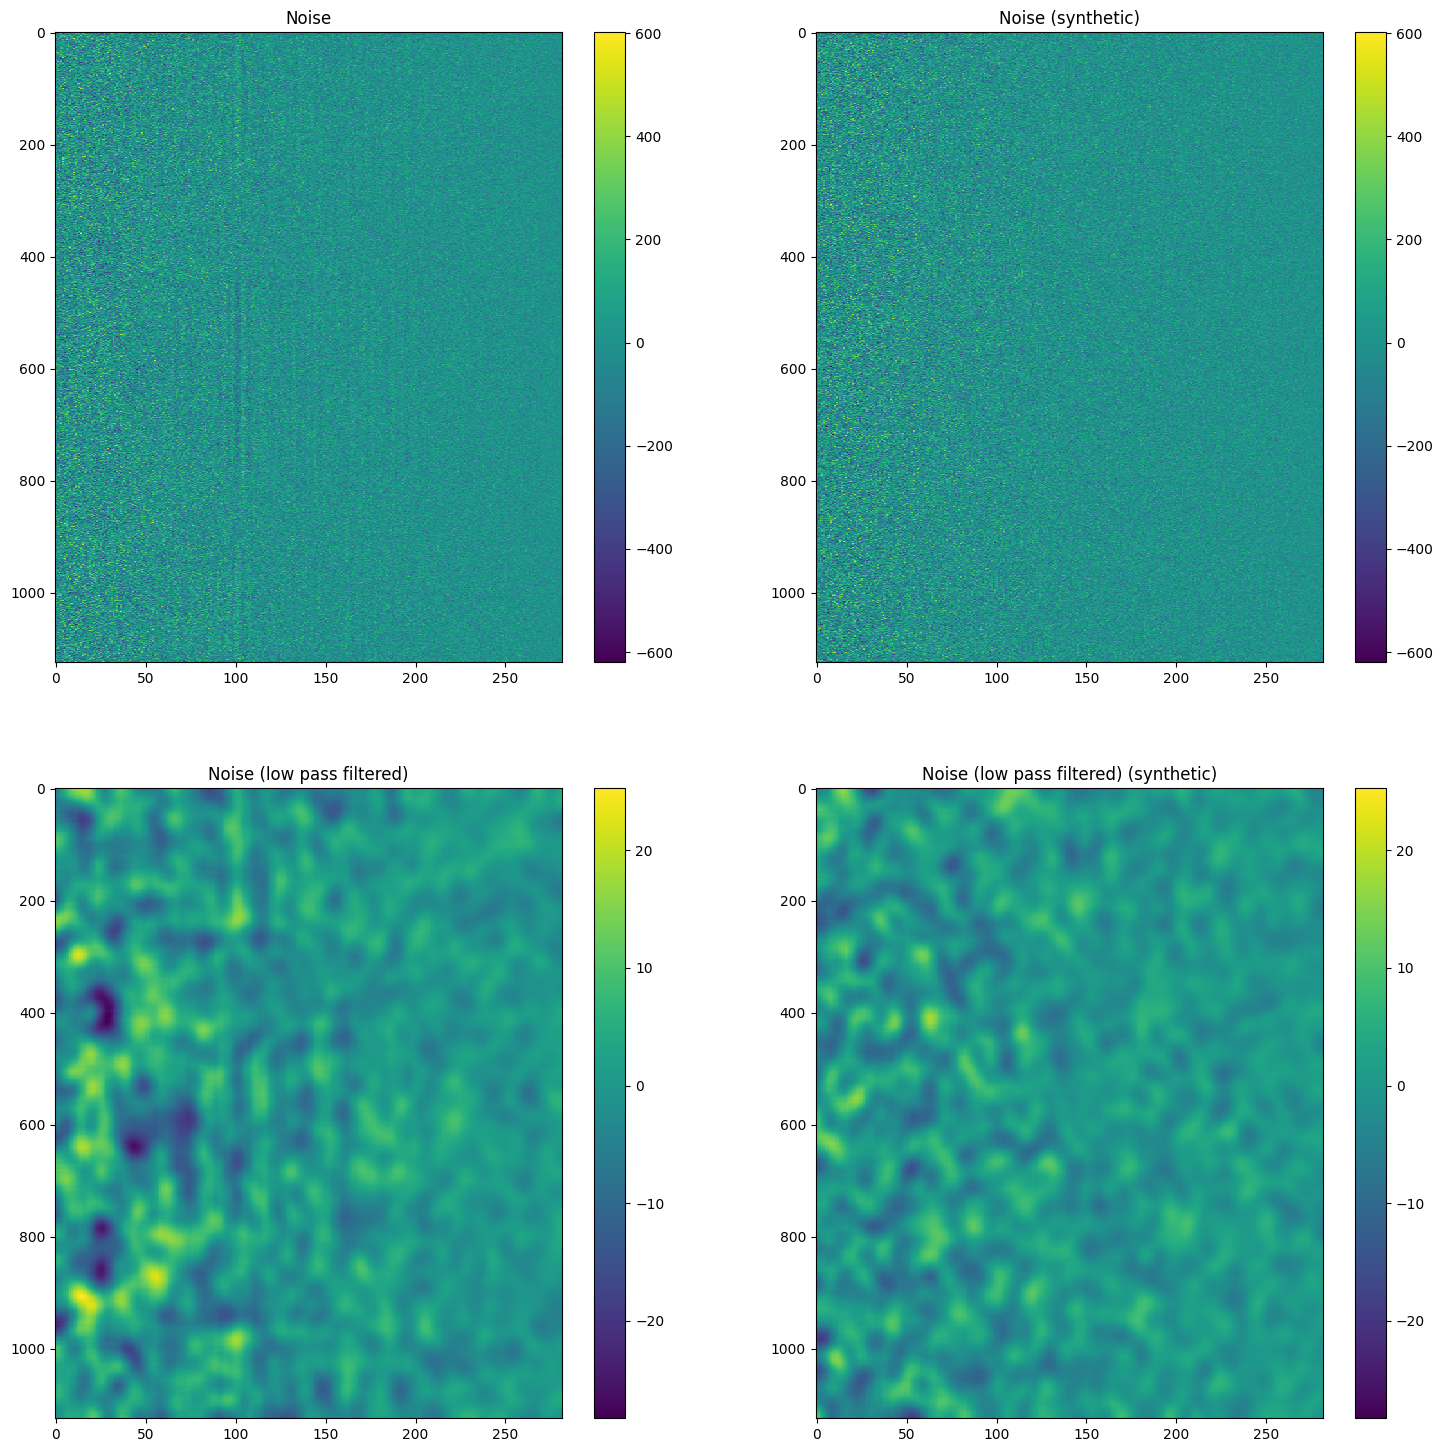

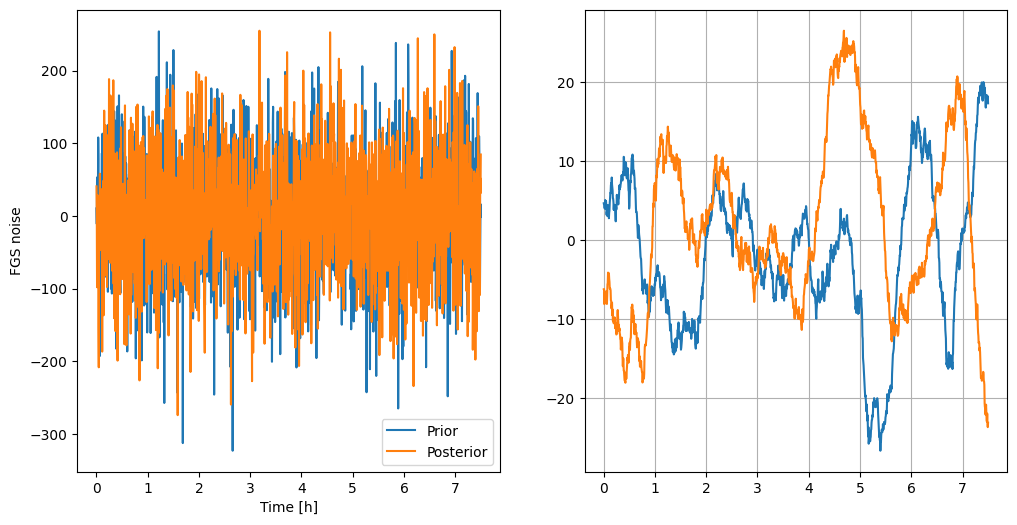

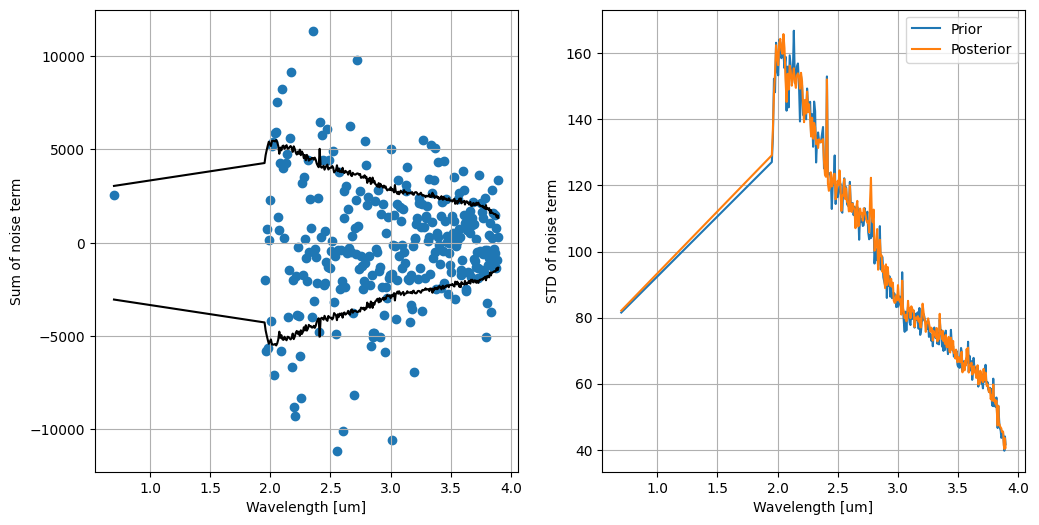

CPU times: user 20.4 s, sys: 4.34 s, total: 24.8 s
Wall time: 26.1 s


In [8]:
%%time
import gp
import ariel_gp
import ariel_load_FGS
importlib.reload(ariel_load_FGS)
importlib.reload(ariel_load)
kgs.profiling=False
kgs.debugging_mode=1
kgs.sanity_checks_active=False
importlib.reload(gp)
importlib.reload(ariel_gp)
model = ariel_gp.PredictionModel()  
model.run_in_parallel=False
model.model_options.use_training_labels = False
model.starter_model.do_plots = False
model.plot_final = True
model.plot_simple = False
#model.model_options.include_background = False
model.model_options.n_iter = 4
model.train(train_data)
#model.starter_model.loaders[0].cache_steps = [5]

for ii in range(2):                
    pass
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca = True                 
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[3] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[2] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[4] = True
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
#model.loaders[1].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[1] = 1
#model.loaders[0].cache_steps = []
model.starter_model.loaders = model.loaders


loaders = model.starter_model.loaders
#loaders[0].cache_steps= []
# loaders[0].apply_wavelength_binning = ariel_load_FGS.ApplyWavelengthBinningFGS2()
# loaders[0].apply_wavelength_binning.n_mean_pixels = 0
# loaders[0].apply_pixel_corrections.mask_hot = False
# loaders[0].apply_full_sensor_corrections.inpainting_2d = True
# loaders[0].apply_full_sensor_corrections.restore_invalids = True
# loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
# old_weights = copy.deepcopy(ariel_load_FGS.FGS_weights)
# ariel_load_FGS.FGS_weights *= 0
# ariel_load_FGS.FGS_weights[0,0] = old_weights[0,0]
#print(ariel_load_FGS.FGS_weights)
#ariel_load_FGS.FGS_weights[3] = 1
#model.model_options.FGS_order = 3
#model.model_options.AIRS_order = 3
#loaders[0].apply_wavelength_binning.options.use_sum = True
# loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
# loaders[1].apply_pixel_corrections.mask_hot = False
# loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
# loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
# loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
# loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
# loaders[1].apply_wavelength_binning.residual_threshold = np.inf
# loaders[1].apply_wavelength_binning.sequential_fit = True


            
#model.loaders[0].cache_steps = [5]
data = [train_data[[d.planet_id for d in train_data].index(1843015807)]] # ingress and egress obscured
1349926825
#data = train_data[1:2]
data = [train_data[[d.planet_id for d in train_data].index(1349926825)]]
#data = train_data[1003:1004]
#data = [train_data[[d.planet_id for d in train_data].index(2270815333)]] # ingress and egress obscured
data= copy.deepcopy(data)
for d in data:
    d.load_to_step(5,model.loaders)
    #d.transits[0].data[1].noise_est*=1000
#print('!!!')
#d.transits = d.transits[1:]
inferred_data = model.infer(data)
#kgs.score_metric(inferred_data, data)
# model.starter_model.do_plots = False
# inferred_data_simple = model.starter_model.infer(data)
# kgs.score_metric(inferred_data_simple, data)

In [4]:
# data2 = copy.deepcopy(data)
# data2[0].transits = data2[0].transits[1:]
# inferred_data2 = model.infer(data2)

In [5]:
# plt.figure()
# plt.plot(3*(inferred_data2[0].spectrum - inferred_data[0].spectrum))
# plt.plot(data[0].spectrum-np.mean(data[0].spectrum))
# plt.figure()


In [6]:
# plt.figure()
# plt.plot(data[0].spectrum - inferred_data[0].spectrum)
# plt.figure()
# xx = data[0].spectrum
# plt.plot(xx-kgs.gaussian_2D_filter_with_nans(xx[:,None],[5,0.001])[:,0])
# # plt.plot(np.diff(data[0].spectrum))
# plt.plot((data[0].spectrum - inferred_data[0].spectrum))
# plt.figure()
# plt.scatter(xx-kgs.gaussian_2D_filter_with_nans(xx[:,None],[5,0.001])[:,0], data[0].spectrum - inferred_data2[0].spectrum)
# # plt.figure()
# # plt.scatter(np.diff(data[0].spectrum), (data[0].spectrum - inferred_data[0].spectrum)[:-1])
# # plt.figure()
# # plt.scatter(np.diff(data[0].spectrum,n=2), (data[0].spectrum - inferred_data[0].spectrum)[:-2])

0.6733371082364351
-4.697924879203755
-5.18090609614428


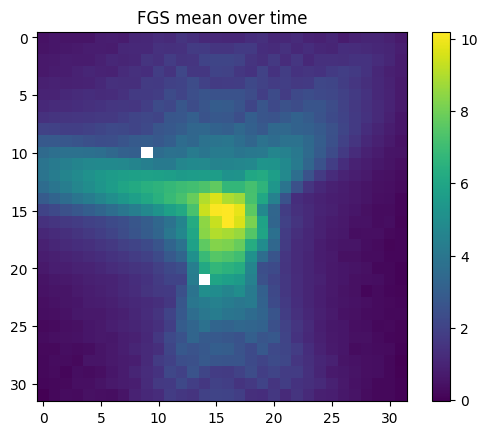

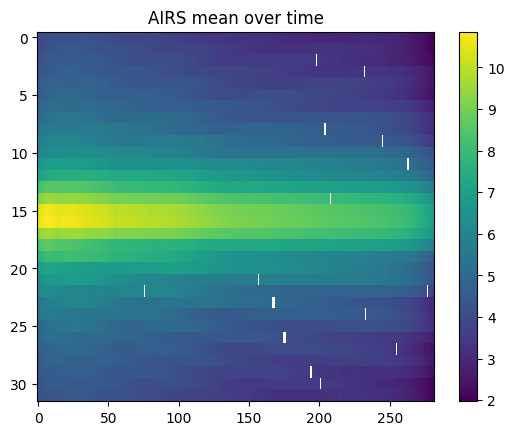

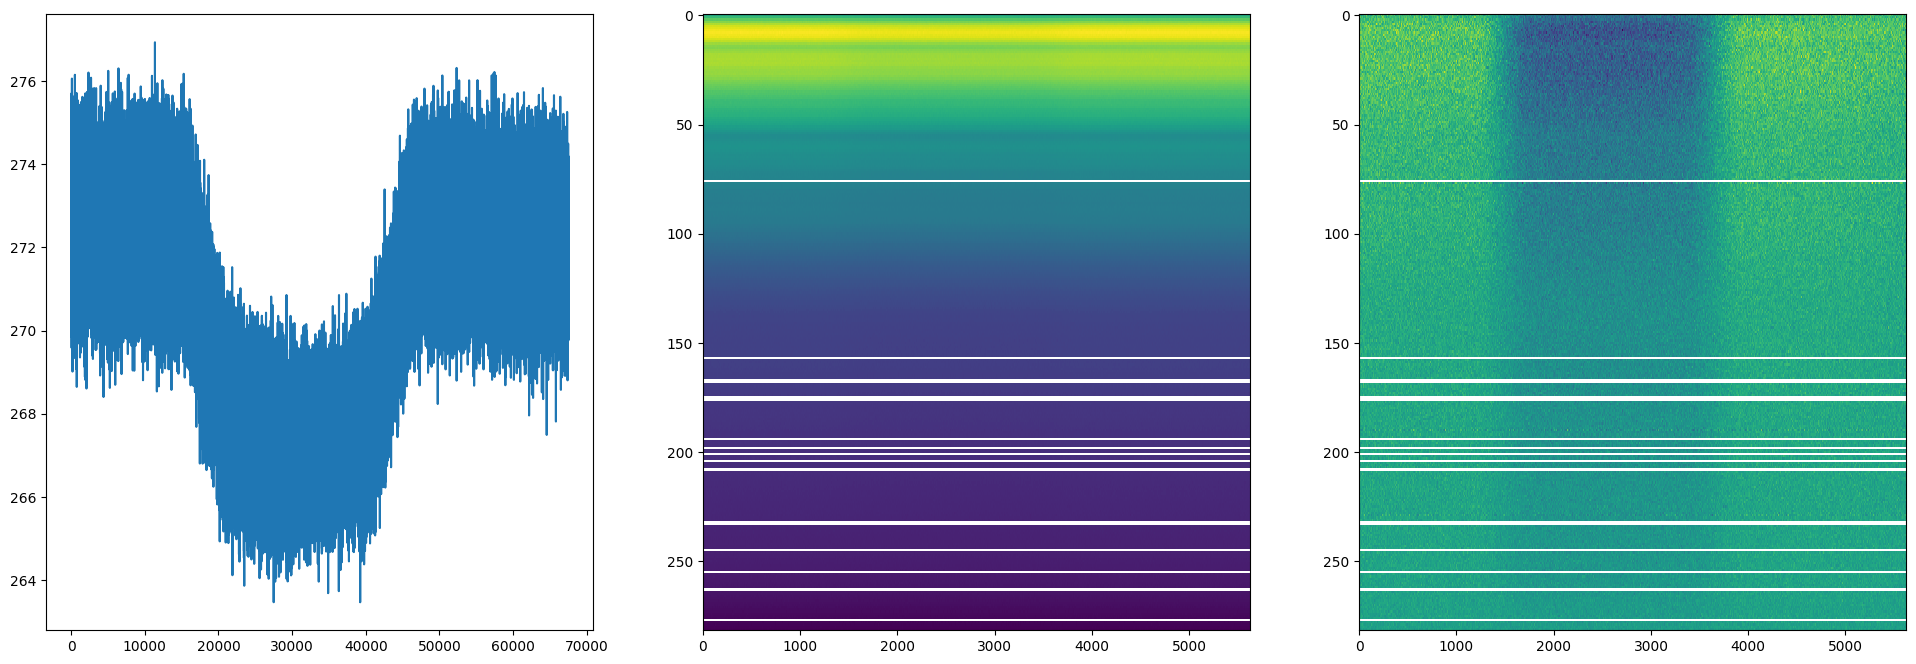

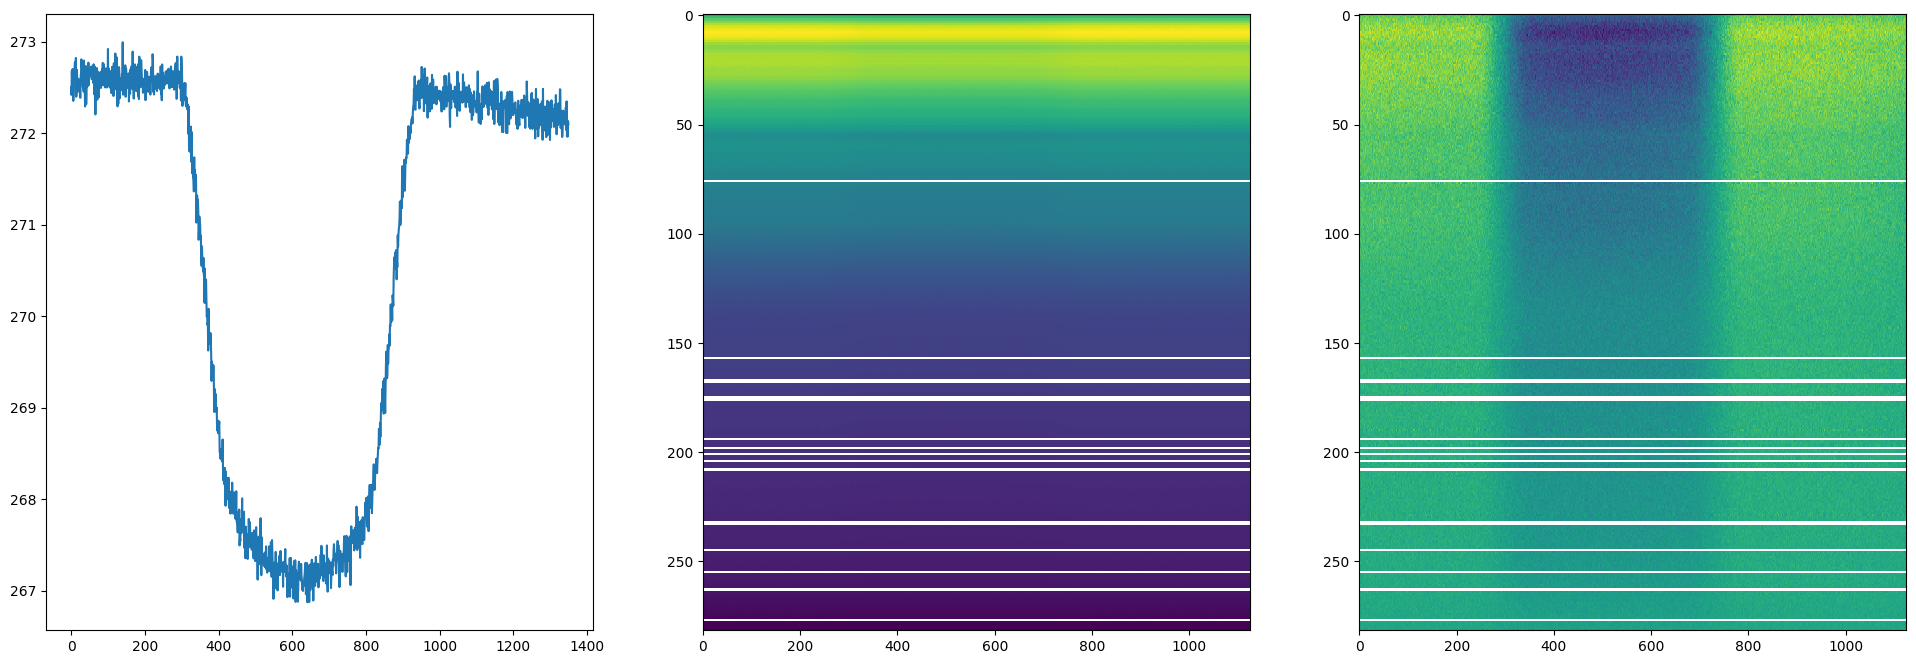

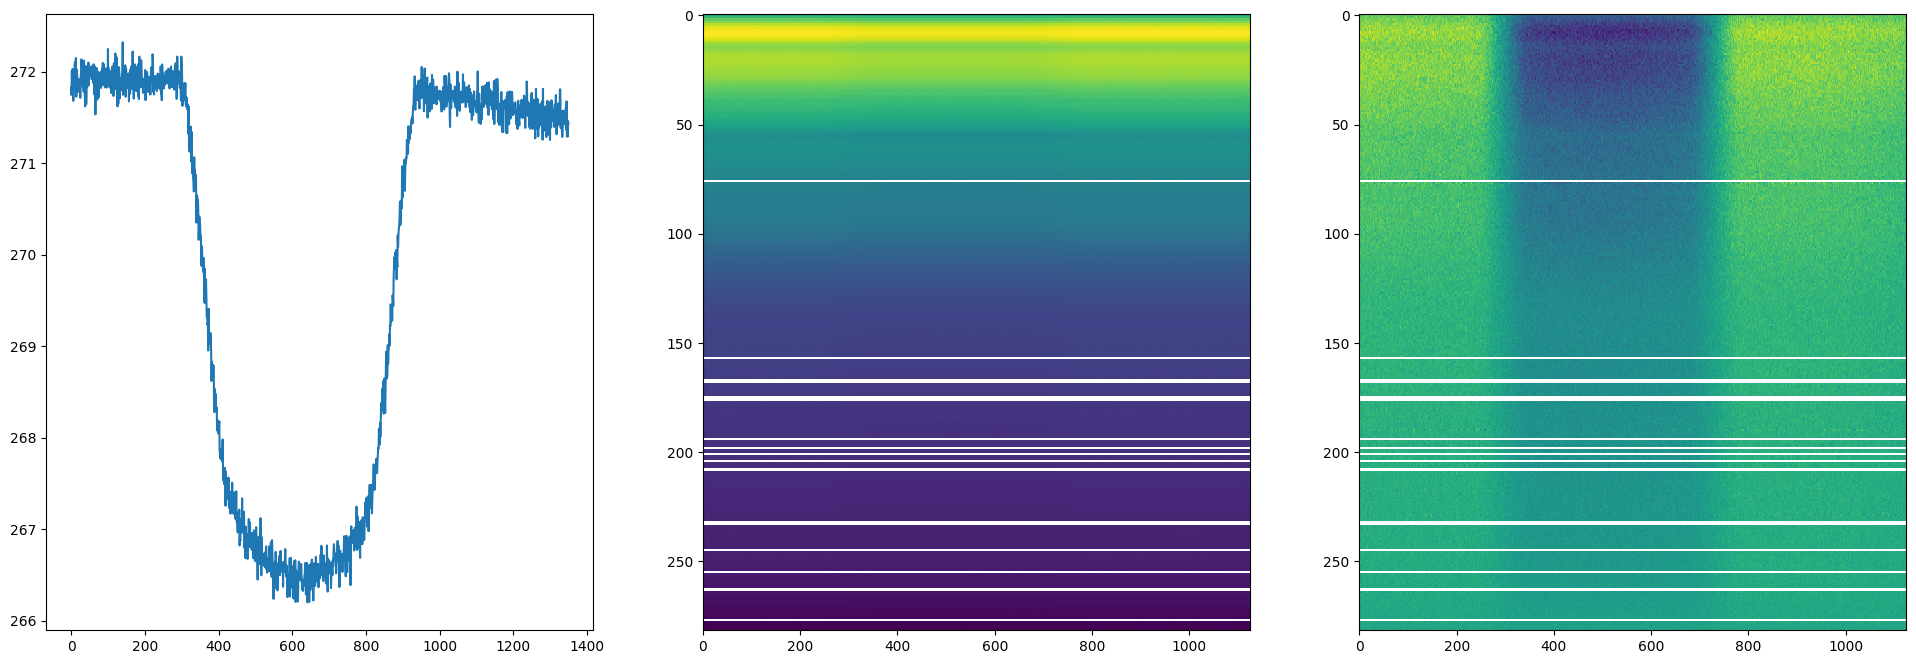

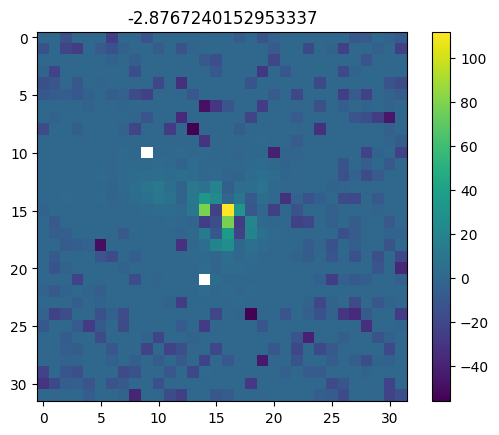

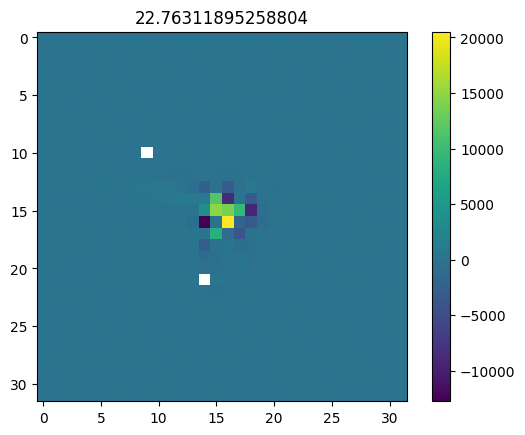

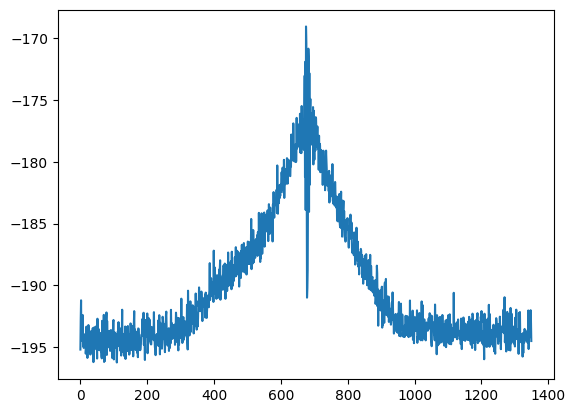

min 0.0 0.0


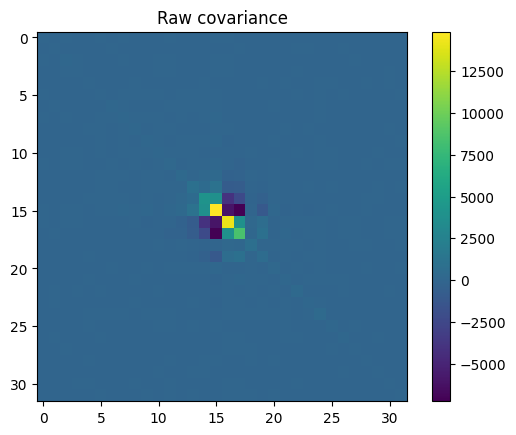

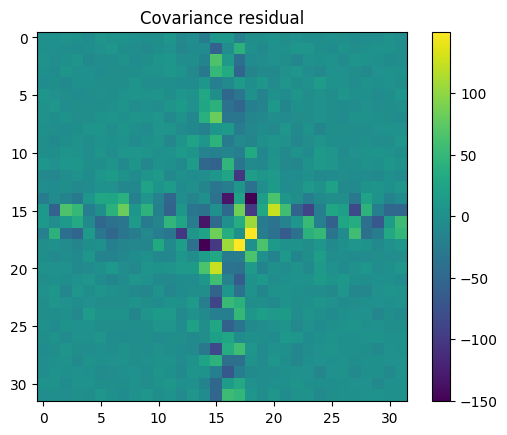

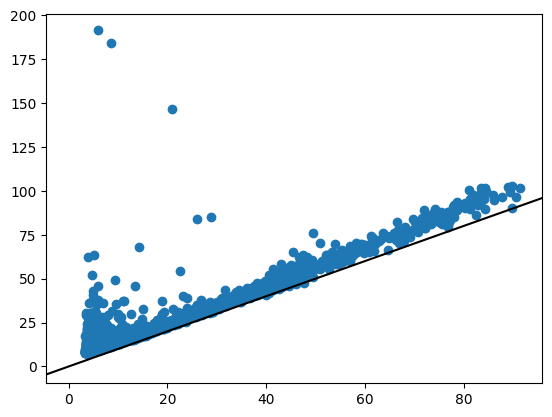

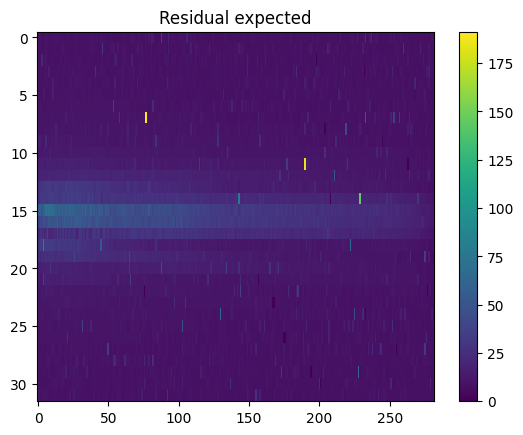

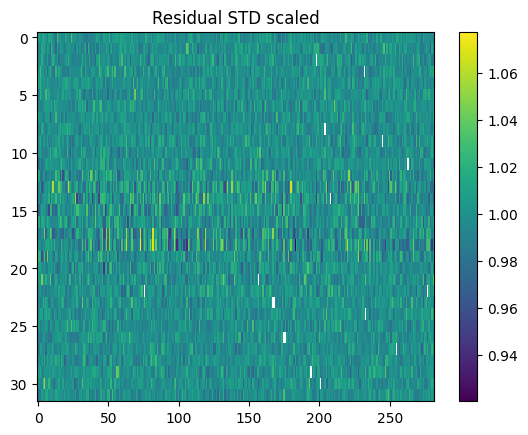

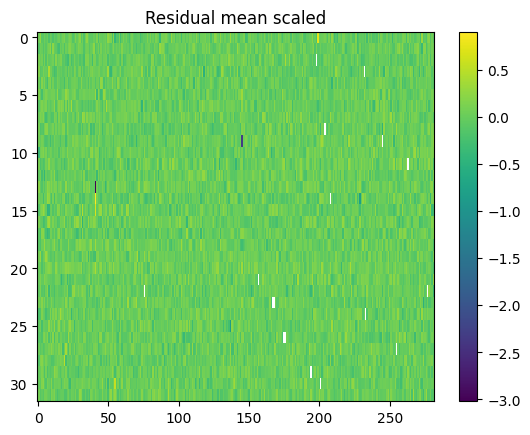

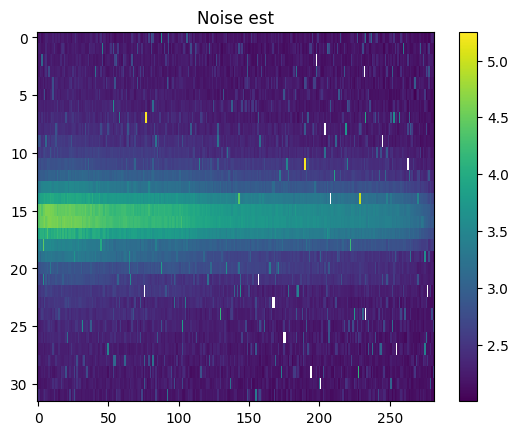

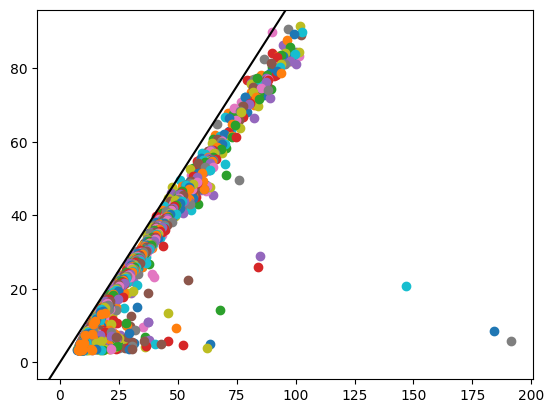

In [18]:
import ariel_load
importlib.reload(ariel_load)
importlib.reload(ariel_load_FGS)
loaders = ariel_load.default_loaders()
loaders[0].cache_steps = []
loaders[1].apply_pixel_corrections.mask_hot = False
ariel_load.raw_data_diagnostics(copy.deepcopy(data[0]), 0, loaders)

In [17]:
%debug

> /mnt/d/ariel2/code/core/ariel_load.py(659)__call__()
    657             noise_est2[to_change] = (noise_est_naive[:,i_wavelength]**2)[to_change]
    658             noise_est = cp.sqrt(noise_est2)
--> 659             assert not cp.any(cp.isnan(noise_est))
    660 #             coeffs[3:][isnan] = 0
    661 #             if np.all(coeffs[3:][~isnan]>6):



ipdb>  noise_est


array([ 8.66109003,  8.88683516,  8.99014108,  9.30033042,  9.6575201 ,
        8.84565116, 10.10760856, 17.43457991, 11.99882969, 10.29550771,
       10.18579578, 12.83288276, 14.68761134, 19.47914525, 30.24757142,
       40.16567397, 42.16736291, 31.66596364, 19.77786096, 13.90122249,
       14.55076157,         nan,  9.59843705, 10.58687884,  9.90188399,
        9.34600623,  8.69125374,  9.40076975,  9.0442821 ,  8.81131689,
        9.04067949, 11.60056929])


ipdb>  noise_est2


array([ 7.50144806e+01,  7.89758392e+01,  8.08226367e+01,  8.64961459e+01,
        9.32676944e+01,  7.82455444e+01,  1.02163751e+02,  3.03964577e+02,
        1.43971914e+02,  1.05997479e+02,  1.03750436e+02,  1.64682880e+02,
        2.15725927e+02,  3.79437100e+02,  9.14915577e+02,  1.61328137e+03,
        1.77808649e+03,  1.00273325e+03,  3.91163784e+02,  1.93243987e+02,
        2.11724662e+02, -2.84217094e-14,  9.21299937e+01,  1.12082004e+02,
        9.80473066e+01,  8.73478325e+01,  7.55378915e+01,  8.83744719e+01,
        8.17990387e+01,  7.76393053e+01,  8.17338857e+01,  1.34573208e+02])


ipdb>  noise_est_naive[:,i_wavelength]


array([ 3.79984191,  3.81237199,  3.9636006 ,  4.13085611,  4.06423782,
        4.43736739,  4.66394171,  4.68283797,  5.55468301,  5.97793965,
        6.61783159,  9.23933419, 11.22978176, 15.42932223, 25.67298568,
       35.21966084, 36.36825521, 27.91032566, 15.71687995, 10.37220195,
       10.55193412,         nan,  5.83420458,  6.13451469,  5.22150292,
        4.58469975,  4.78345161,  4.33141463,  4.12284536,  4.21213094,
        3.92765055,  3.8613829 ])


ipdb>  q
